In [ ]:
!wget -q https://static.wixstatic.com/media/507339_0d4a0400a92c4db28353d9daab20bad0~mv2.jpg -O /tmp/chicago.jpg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -q /content/drive/MyDrive/style/mosaic.zip -d /tmp/style

In [ ]:
!unzip -q /content/drive/MyDrive/style/rain_princess.zip -d /tmp/style

In [ ]:
!unzip -q /content/drive/MyDrive/style/udnie.zip -d /tmp/style

In [ ]:
!unzip -q /content/drive/MyDrive/style/wave.zip -d /tmp/style

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from skimage import transform
import numpy as np

In [ ]:
def post_process(img):
  img = tf.clip_by_value(img, 0, 255)
  img = img.numpy()
  img = tf.squeeze(img)
  img = img.numpy()
  img = img.astype(int)
  return img

In [ ]:
def get_image(img_path, img_size=False):
  img = load_img(img_path)
  img = img_to_array(img, dtype=np.float32)
  if img_size != False:
    img = resize_img(img, img_size)
  return img

In [14]:
mosaic = tf.keras.models.load_model("/tmp/style/mosaic/saved_models")
rain_princess = tf.keras.models.load_model("/tmp/style/rain_princess/saved_models")
udnie = tf.keras.models.load_model("/tmp/style/udnie/saved_models")
wave = tf.keras.models.load_model("/tmp/style/wave/saved_models")


In [11]:
img = get_image("/content/drive/MyDrive/ComputerVision/cat.jpg")
img_tensor = tf.convert_to_tensor(img)
img_tensor = tf.expand_dims(img_tensor, 0)

In [15]:
res_mosaic = post_process(mosaic(img_tensor))
res_rain_princess = post_process(rain_princess(img_tensor))
res_udnie = post_process(udnie(img_tensor))
res_wave = post_process(wave(img_tensor))

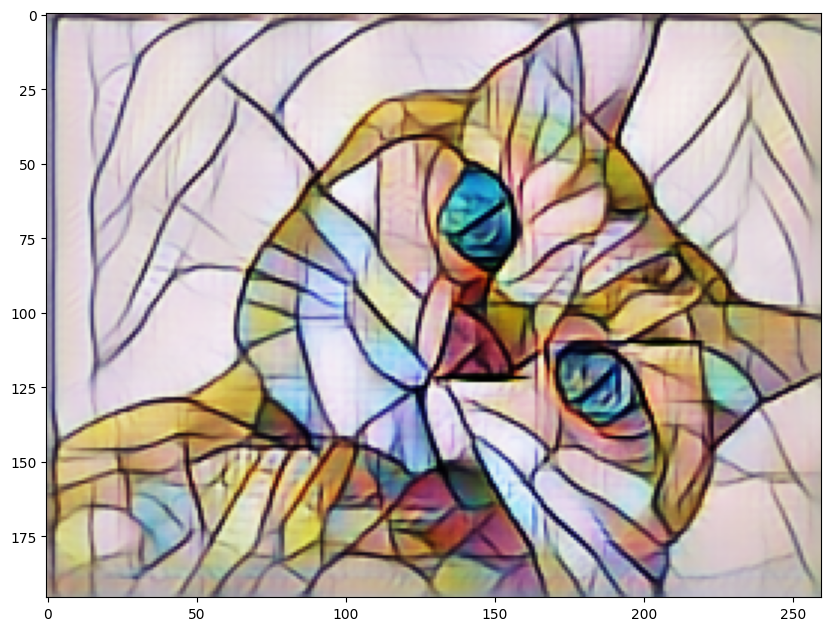

In [16]:
plt.figure(1, (10,10))
plt.imshow(res_mosaic)

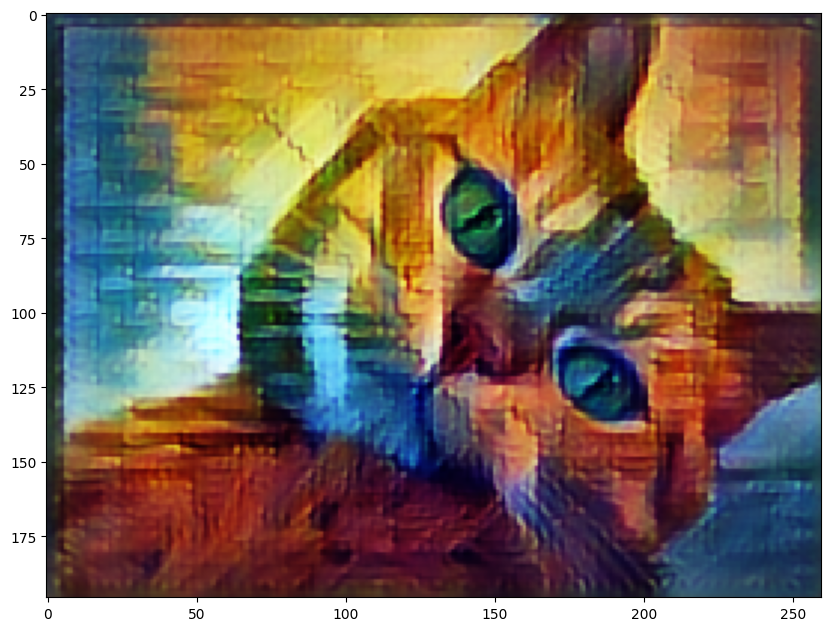

In [18]:
plt.figure(1, (10,10))
plt.imshow(res_rain_princess)

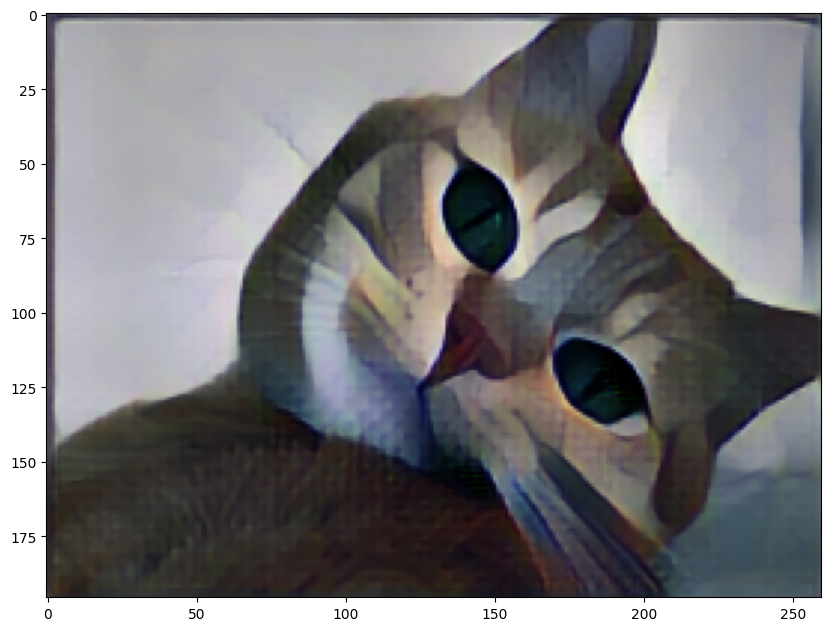

In [19]:
plt.figure(1, (10,10))
plt.imshow(res_udnie)

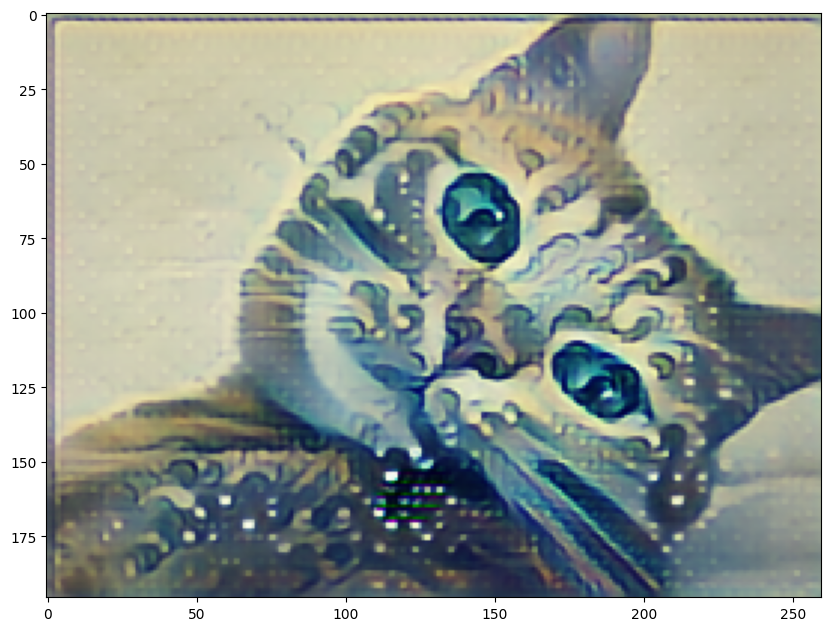

In [20]:
plt.figure(1, (10,10))
plt.imshow(res_wave)